<h1>Importing data</h1>

In [1]:
import numpy as np
import folium 
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
import requests
from io import StringIO
import pandas as pd

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = requests.get(URL)
text = StringIO(resp.text)
import pandas as pd
df= pd.read_csv(text)
print('Data downloaded!')

Data downloaded!


<h1>Checking data</h1>

In [7]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [11]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

<h1>Plotting Line chart to show sales fluctuation from year to year</h1>

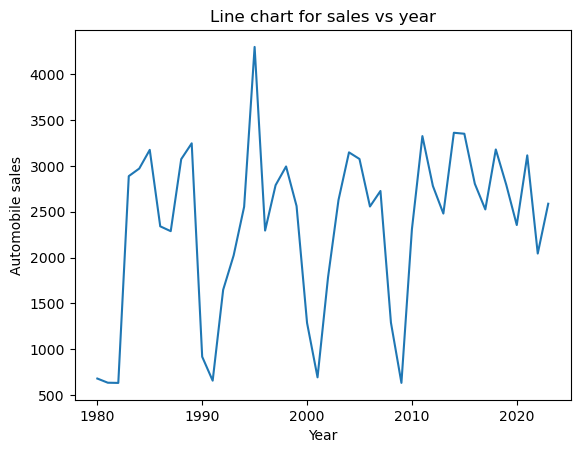

In [17]:
avg_sales = df.groupby(df['Year'])['Automobile_Sales'].mean()

avg_sales.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Automobile sales')
plt.title('Line chart for sales vs year')
plt.show()


<h1>Incliduing ticks on X-axis from 1980 to 2023 on graph</h1>

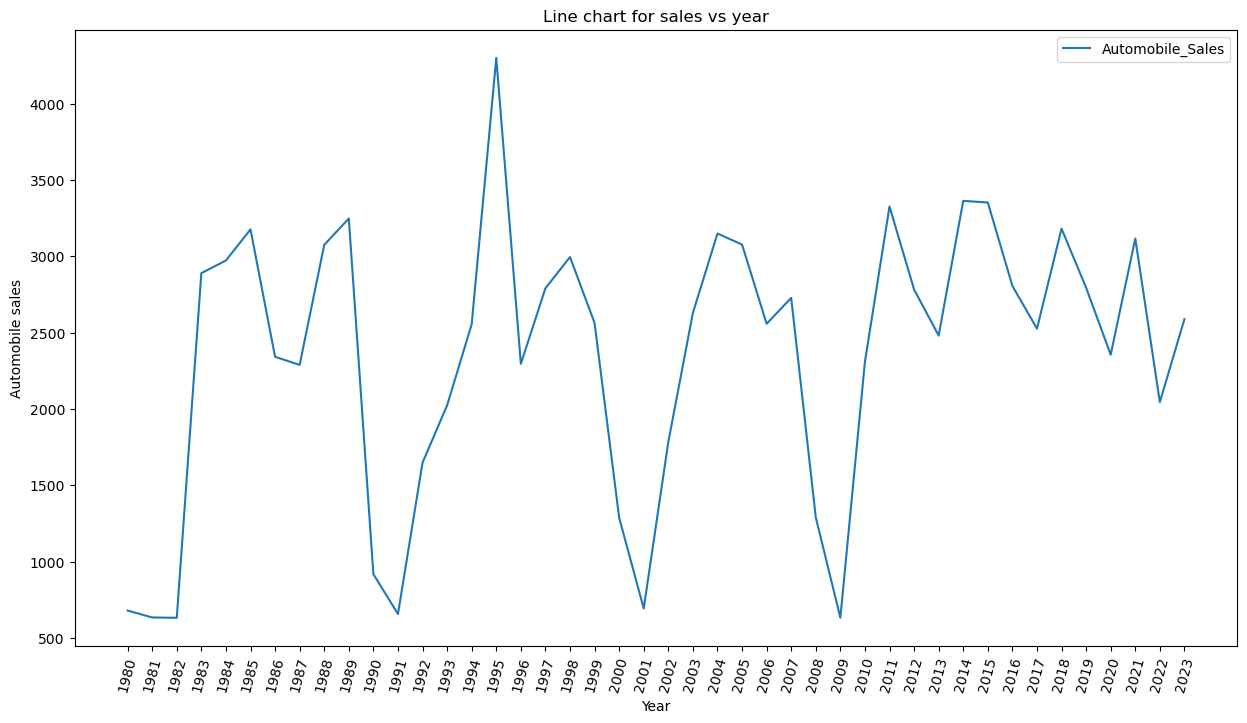

In [23]:
plt.figure(figsize =(15,8))
avg_sales.plot(kind = 'line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Year')
plt.ylabel('Automobile sales')
plt.title('Line chart for sales vs year')
plt.legend()
plt.show()

<h1>Plotting line chart for different categories of vehical types and analyze trends</h1>

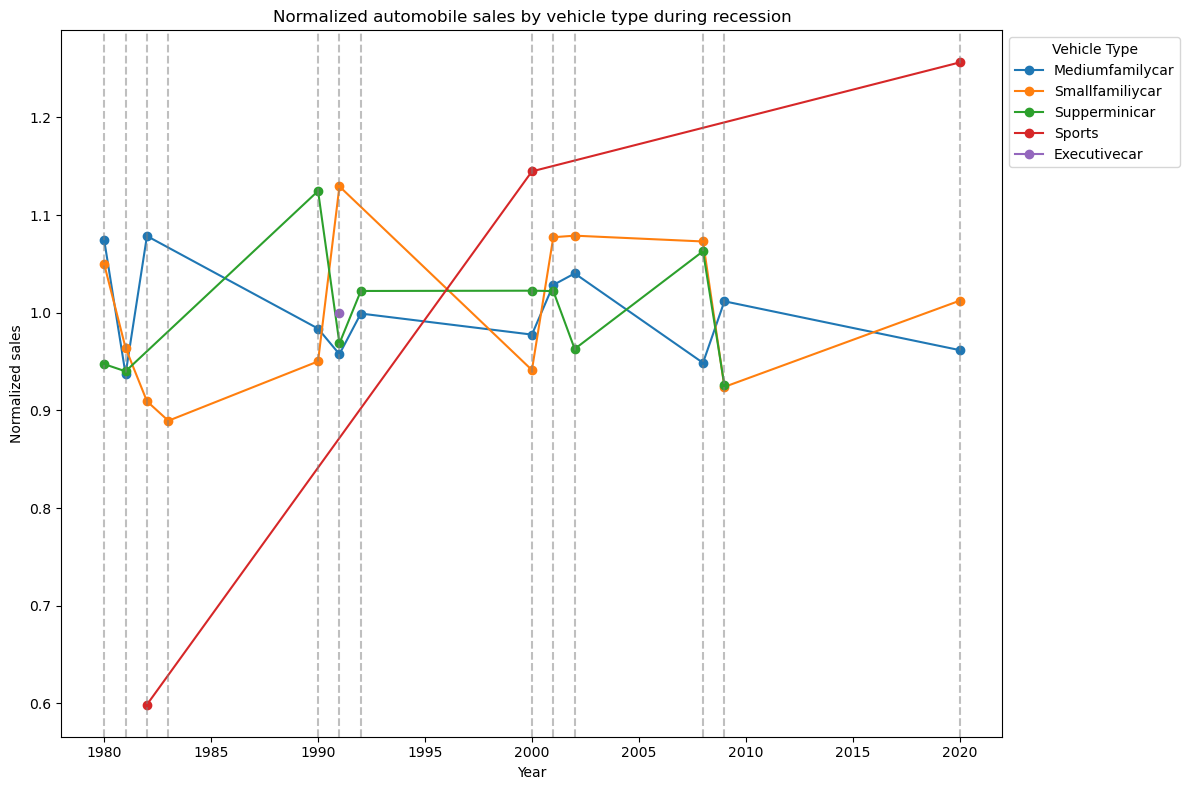

In [42]:
df_rec = df[df['Recession']==1]

df_Mline = df_rec.groupby(['Year','Vehicle_Type'], as_index = False)['Automobile_Sales'].mean()


df_Mline['Normalized_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x/x.mean())

df_Mline.set_index('Year', inplace = True)

plt.figure(figsize=(12,8))

for vehicle_type in df_Mline['Vehicle_Type'].unique():
  
    data = df_Mline[df_Mline['Vehicle_Type']==vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], label = vehicle_type, marker = 'o')


recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x= year, color='grey', linestyle='--', alpha=0.5)


plt.legend(title='Vehicle Type', bbox_to_anchor=(1,1), loc='upper left')
plt.ylabel('Normalized sales')
plt.xlabel('Year')

plt.title('Normalized automobile sales by vehicle type during recession')
plt.tight_layout()
plt.show()

<h2>Insights from above graph</h2>

Sports automotive showed strong growth during recession presiods. Medium famile car to less extent, small family car sales showed sensitive reactiion to economic change with less consistent trends. Upward trend in sports vehical sales indicatetd stability of luxury market even druring economic downturns.

<h1>Using seaborn to visualize sales trend per vehical type for reccsion and non recesion period</h1>

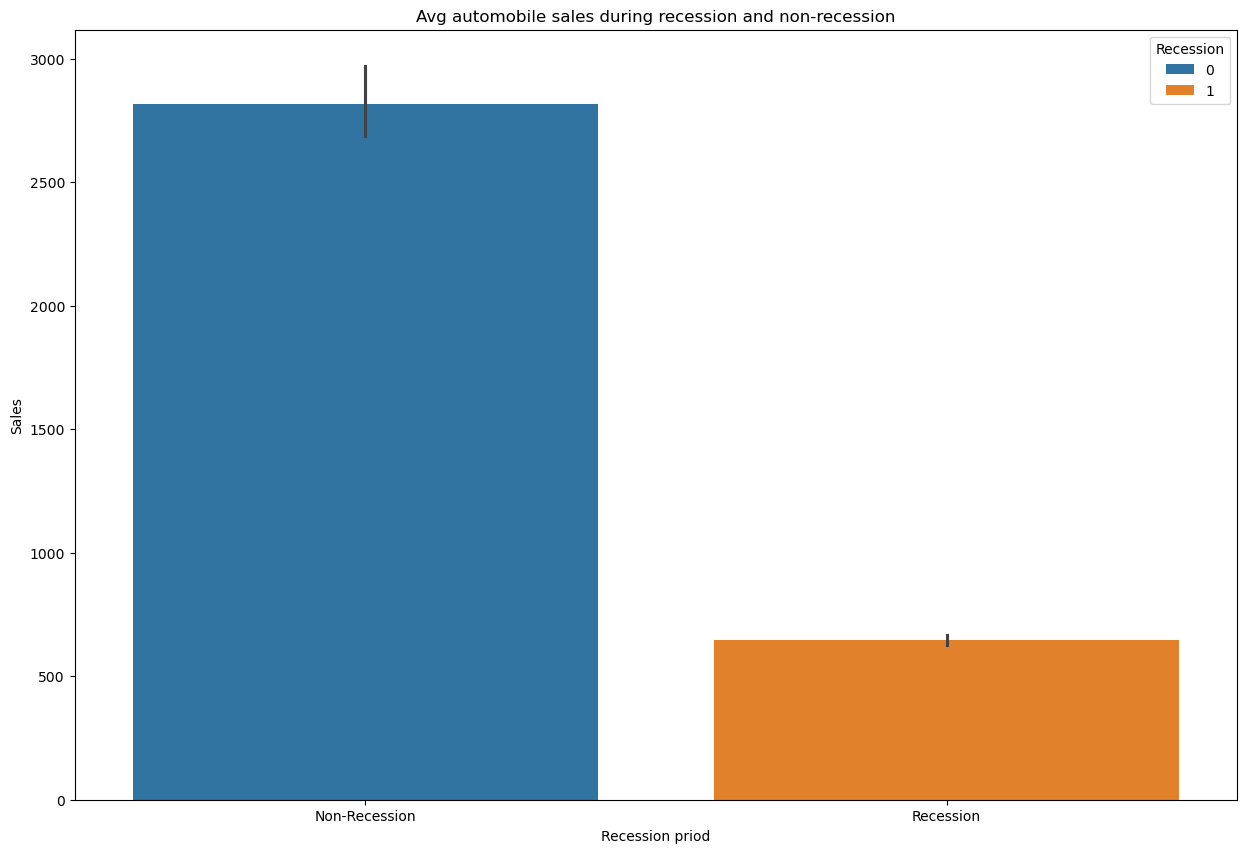

In [45]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(15,10))
sns.barplot(x='Recession', y ='Automobile_Sales', hue ='Recession', data=df)
plt.xlabel('Recession priod')
plt.ylabel('Sales')
plt.title('Avg automobile sales during recession and non-recession')
plt.xticks(ticks=[0,1], labels=['Non-Recession','Recession'])
plt.show()

<h1>Comparing sales of differnet vehical types during recession and non recession</h1>

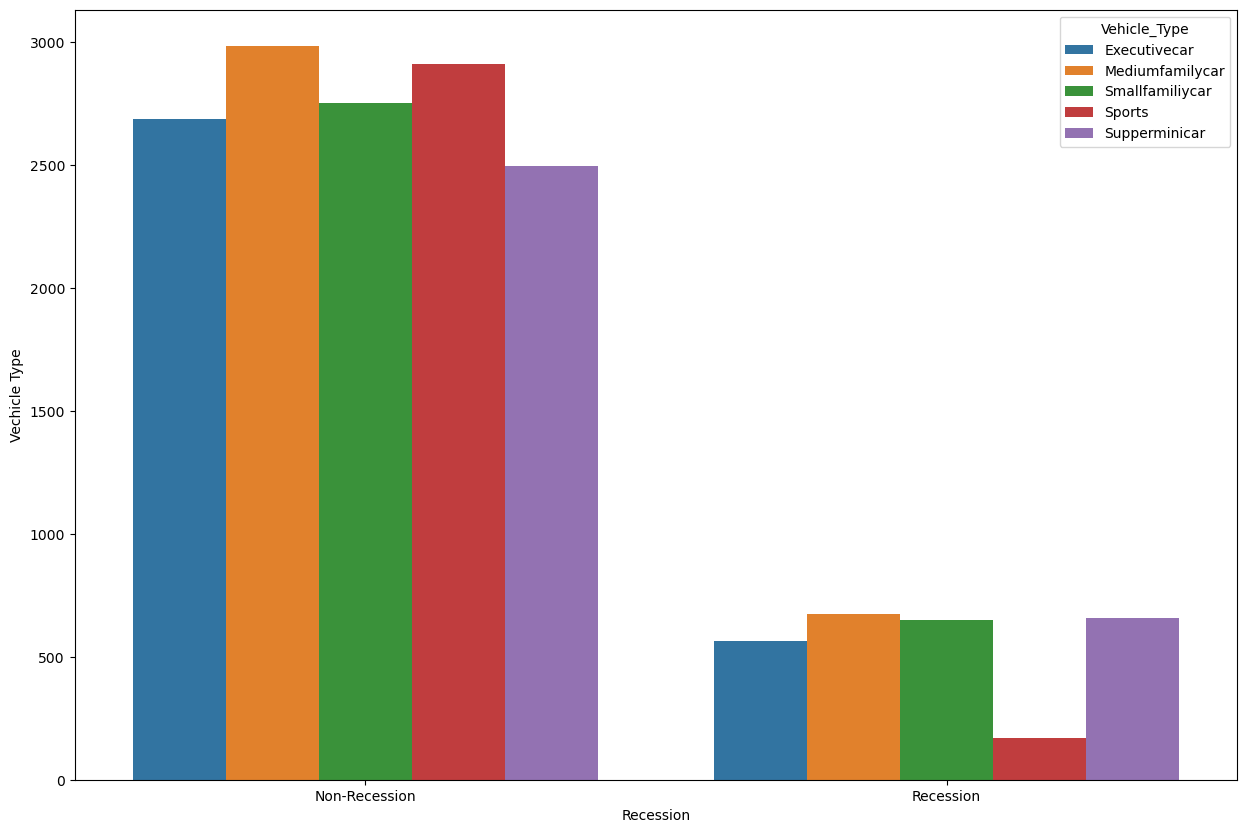

In [57]:
grouped_df = df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(15,10))
sns.barplot(x='Recession', y='Automobile_Sales',hue='Vehicle_Type',data = grouped_df)
plt.xticks(ticks=[0,1], labels = ['Non-Recession','Recession'])
plt.xlabel('Recession')
plt.ylabel('Vechicle Type')
plt.show()

<h2>Insight from above graph</h2>

<h1>Comparing variation in GDP during recession and non-recession period wiht line plot</h1>

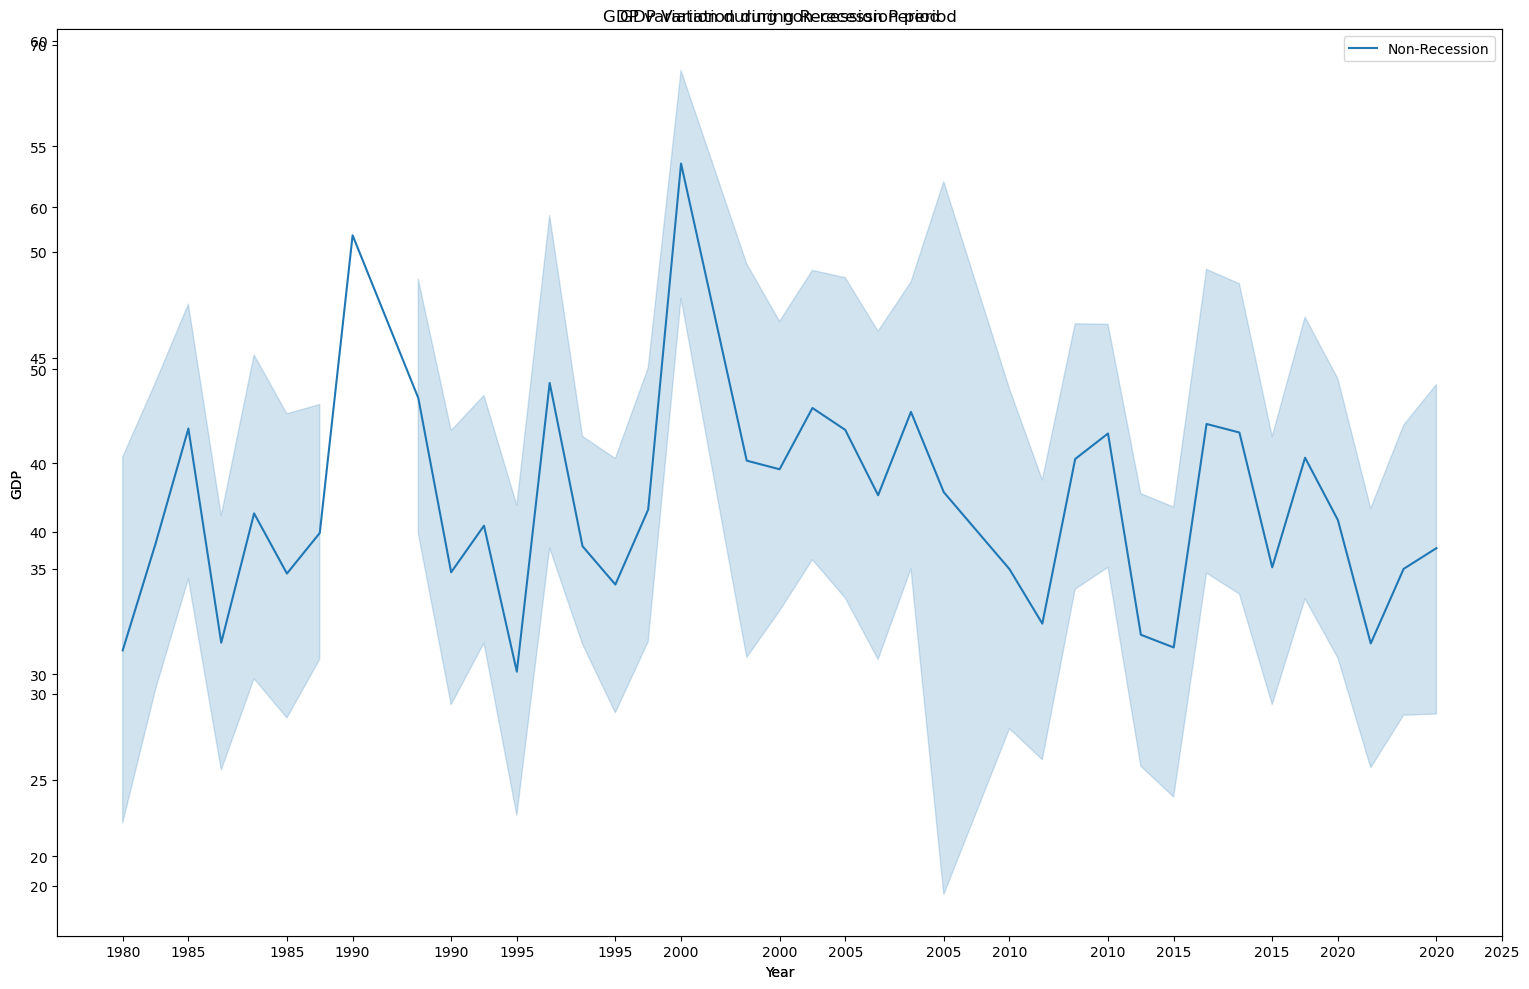

In [70]:
rec_data = df[df['Recession']==1]
non_rec = df[df['Recession']==0]

fig= plt.figure(figsize=(30,10))

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,1)

sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

sns.lineplot(x='Year', y='GDP',data = non_rec, label = 'Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP variation during non-recession period')

plt.tight_layout()
plt.show()

<h2>Inference</h2>

<h1>Bubble plot to display impact of seasonality of automobile sales</h1>

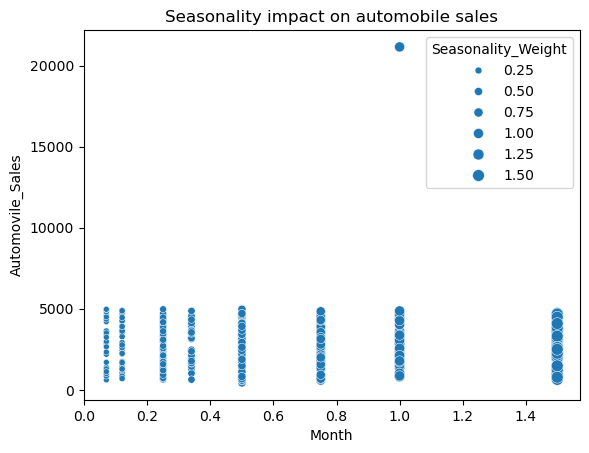

In [101]:
non_rec_data = df[df['Recession']==0]

size = non_rec_data['Seasonality_Weight']

sns.scatterplot(data= non_rec_data, x='Seasonality_Weight',y='Automobile_Sales', size = size)

plt.xlabel('Month')
plt.ylabel('Automovile_Sales')
plt.title('Seasonality impact on automobile sales')
plt.show()

<h2>Inference</h2>

Seasonality has not affected overall sales

<h1>Using matplotlib to develop scatter plot to identify correlation between avg vehicle price related to sales during volumnes during recession</h1>

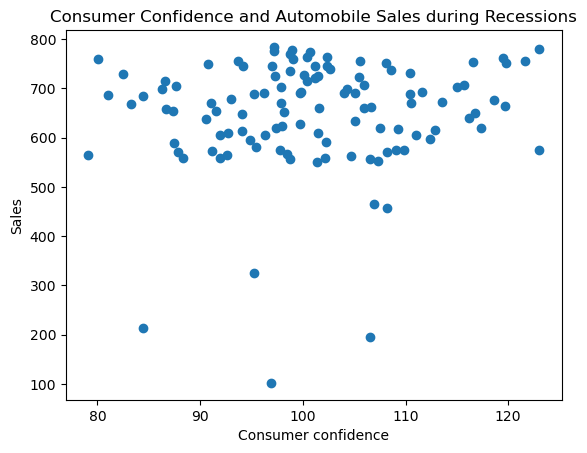

In [77]:
rec_Data = df[df['Recession']==1]
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

plt.xlabel('Consumer confidence')
plt.ylabel('Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

<h1>Graph for relationship between avg vehical price and sales during recession</h1>

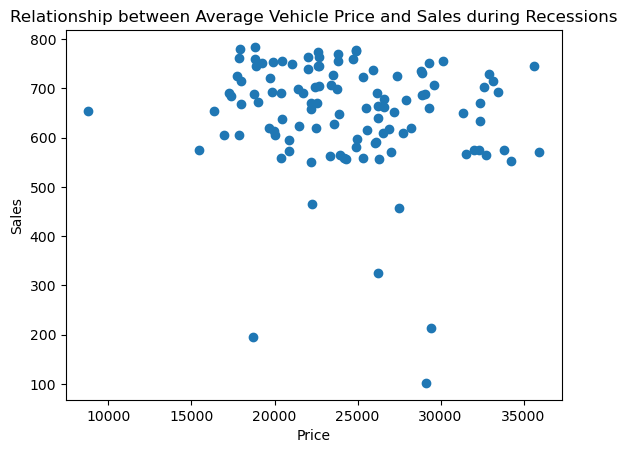

In [79]:
rec_Data = df[df['Recession']==1]
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])

plt.xlabel('Price')
plt.ylabel('Sales')
plt.title( 'Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

<h2>Inference</h2>

<h1>Creating pie chart to display advertising expenditure of XYZAutomotive during recession and non-recession periods</h1>

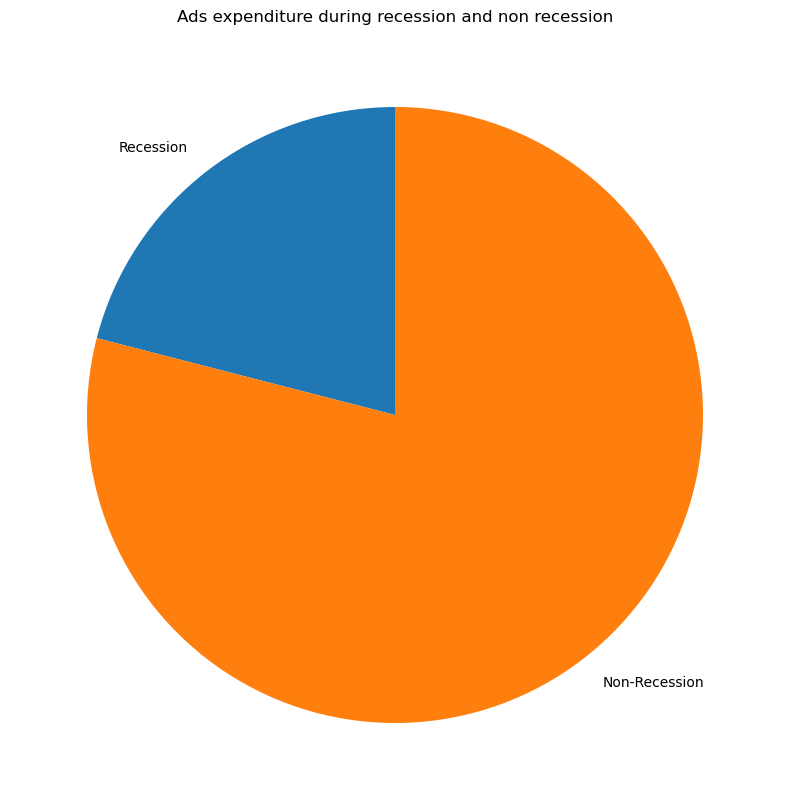

In [84]:
Rdata = df[df['Recession']==1]
NRdata = df[df['Recession']==0]

RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

plt.figure(figsize=(20,10))

labels =['Recession','Non-Recession']

sizes=[RAtotal, NRAtotal]
plt.pie(sizes, labels = labels, startangle =90)
plt.title('Ads expenditure during recession and non recession')
plt.show()

<h2>Inference</h2>

<h1>Pie charrt to display total ads expenditure for each vechical type during recession period</h1>

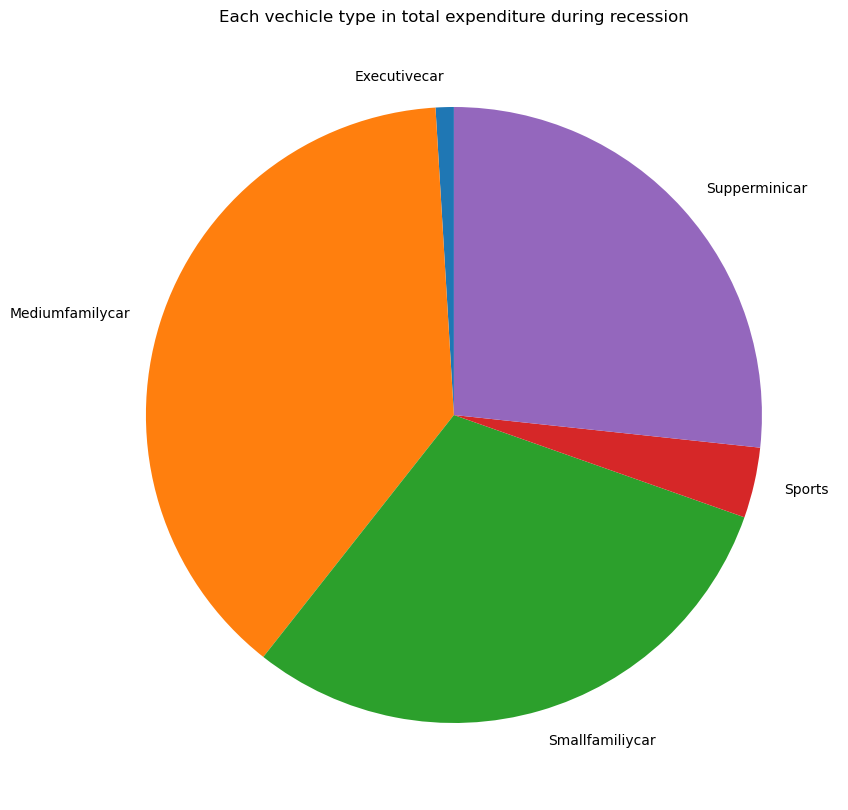

In [89]:
Rdata = df[df['Recession']==1]

VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

plt.figure(figsize=(20,10))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, startangle=90)
plt.title('Each vechicle type in total expenditure during recession')
plt.show()

<h2>Inference</h2>

<h1>Lineplot to analyse effect of unemployment rate on vehicle type and sales during recession </h1>

C:\Users\dhyan\AppData\Local\Temp\ipykernel_17952\3329579205.py:3: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data =df_rec,x='unemployment_rate',y='Automobile_Sales',


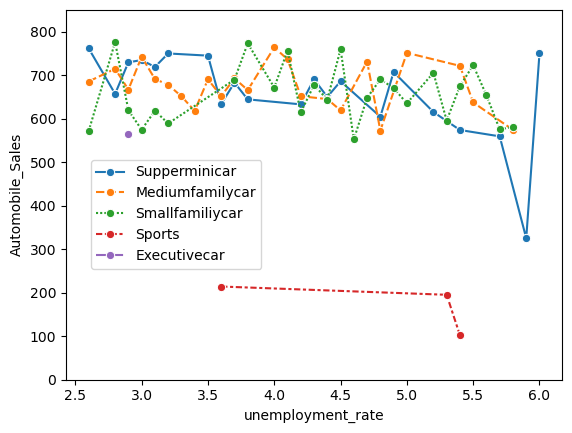

In [95]:
df_rec = df[df['Recession']==1]

sns.lineplot(data =df_rec,x='unemployment_rate',y='Automobile_Sales',
            hue ='Vehicle_Type', style = 'Vehicle_Type', markers = 'o', err_style =None)

plt.ylim(0,850)
plt.legend(loc=(0.05,.3))

<h2>Inference</h2>